In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
from dataloader import DataLoader
from PIL import Image
from _graphutils import GraphUtils
from _plotutils import PlotUtils
from kernels.wlkernel import WLKernel
from kernels.shortestpathkernel import ShortestPathKernel
from kernels.randomwalkkernel import RandomWalkKernel
from kernels.labelhasher import LabelHasher
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import LeaveOneOut

In [3]:
dl = DataLoader("../eyelink_data")
imgs = dl.get_example_images()

PLOT = {
    "aois": False,
    "scanpaths": False,
    "clustering": False,
    "matrices": False,
    "graphs": False,
    "kernel": False,
    "tsne": False,
    "mds": True,
    "loocv": False
}

KeyboardInterrupt: 

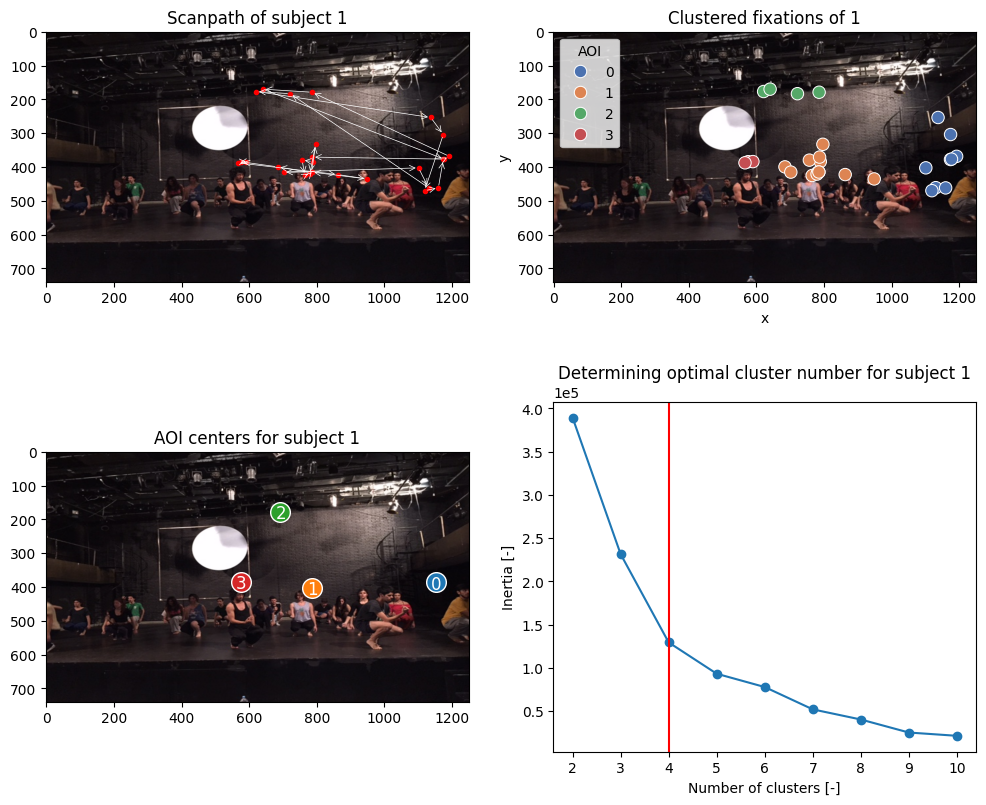

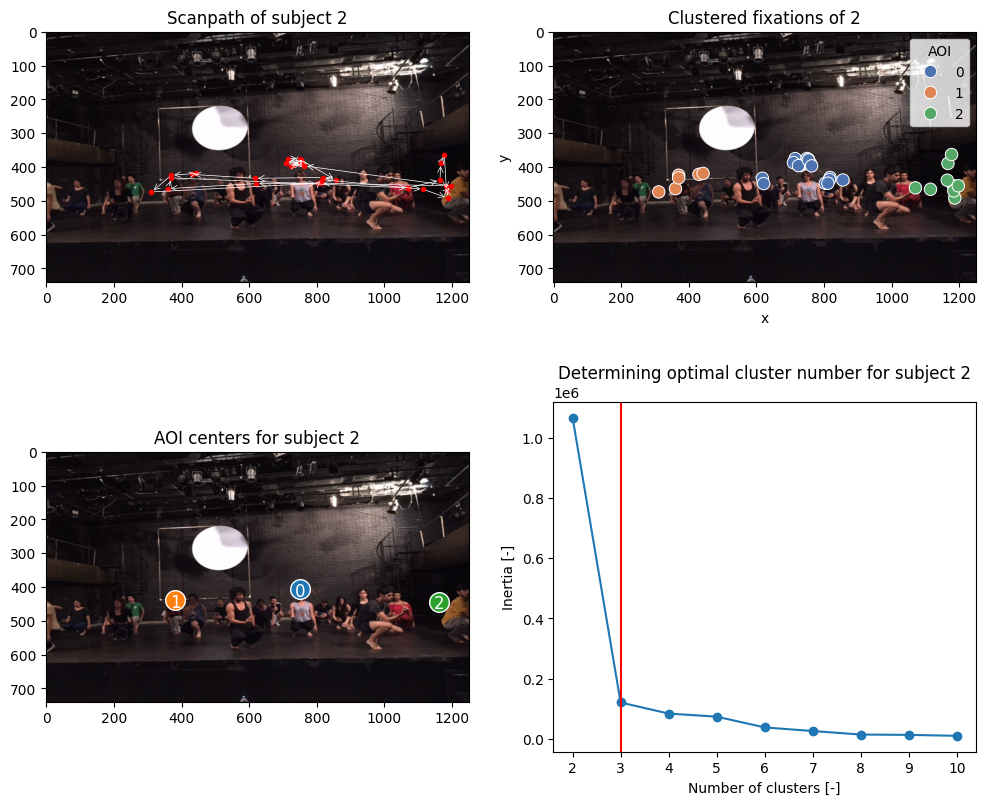

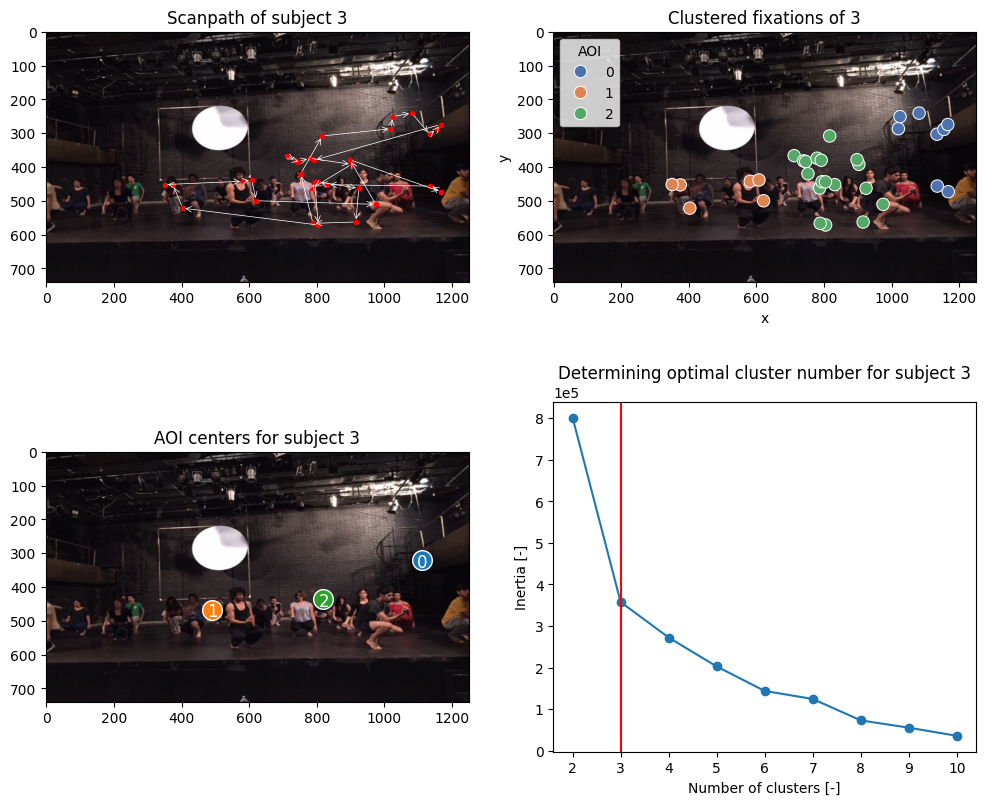

In [ ]:
for img in imgs[0:1]:
    img_file = dl.get_image(img)
    aois = dl.get_image_aois(img)


    trials = dl.get_image_trials(img)

    MIN_CLUSTERS = 2
    MAX_CLUSTERS = 10


    for i, (subject, trial) in enumerate(trials.items()):

        dfs, inertias, cluster_centers = GraphUtils.clustering(MIN_CLUSTERS, MAX_CLUSTERS, trial)
        fig, axs = PlotUtils.wrap_subplots(4, 2)
        trial_clustered, inertia, aois, k = GraphUtils.optimal_clustering(MIN_CLUSTERS, MAX_CLUSTERS, trial)
        PlotUtils.trace_plot(trial, image=img_file, ax=axs[0], title=f"Scanpath of subject {subject}")
        PlotUtils.clustering_plot(trial_clustered, image=img_file, ax=axs[1], title=f"Clustered fixations of {subject}")
        PlotUtils.plot_aois(aois=aois, image=img_file, ax = axs[2], title=f"AOI centers for subject {subject}")
        PlotUtils.elbow_plot(inertias, ax=axs[3], title=f"Determining optimal cluster number for subject {subject}")






"""     # MATCHING TO NEAREST AOI

    trials_clustered = {subject: GraphUtils.cluster_to_aois(trial, aois) for (subject, trial) in trials.items()}


    MIN_CLUSTERS = 2
    MAX_CLUSTERS = 10

    trials_clustered: dict[int, pd.DataFrame] = {}
    cluster_centers: dict[int, dict[int, tuple[float, float]]] = {}
    for (subject, trial) in trials.items():
        df_clustered, intertia, cluster_c, k = GraphUtils.optimal_clustering(MIN_CLUSTERS, MAX_CLUSTERS, trial)
        trials_clustered[subject] = df_clustered
        cluster_centers[subject] = cluster_c

    if PLOT:
        PlotUtils.wrap_dict_plot(trials_clustered, n_wrap=3, plotting_function=PlotUtils.clustering_plot, title="Subject", image=img_file) """
